In [1]:
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0,'./')
sys.path.insert(0,'./Graphs/')
import Plot
import ExpectedMapping
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import json
from bson import json_util
%matplotlib inline

In [2]:
import random
from matplotlib.patches import Rectangle

# Individual Feature Analysis

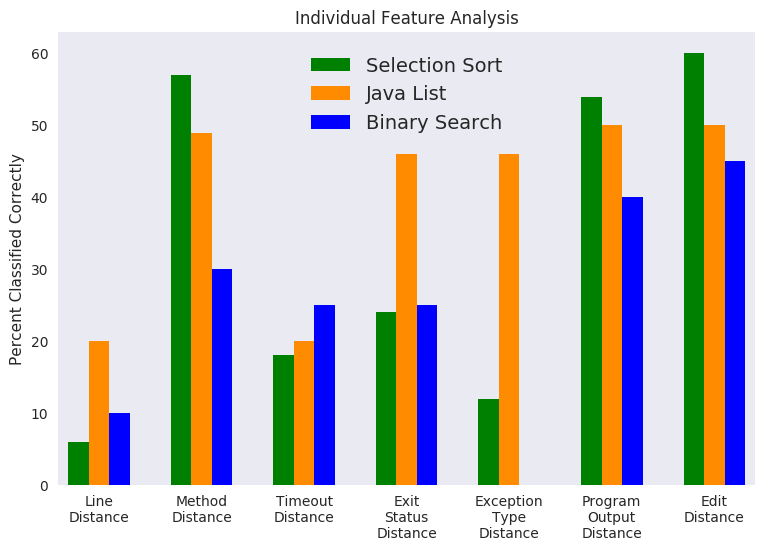

In [191]:
writeGraphToFile = True
my_dpi = 100
width = 950
height = 670

xLabels = ['',
			'Line\nDistance',
			'Method\nDistance',
			'Timeout\nDistance',
			'Exit\nStatus\nDistance',
			'Exception\nType\nDistance',
			'Program\nOutput\nDistance',
			'Edit\nDistance']

#x = date2num(x)
x = np.array([0.0,1.0,2.0,3.0,4.0,5.0,6.0])

selectionY = np.array([2.0, 19.0, 6.0, 8.0, 4.0, 18.0, 20.0])
selectionY *= 100/28

binaryY = np.array([2.0, 6.0, 5.0, 5.0, 0.0, 8.0, 9.0])
binaryY *= 100/17

listY = np.array([20,49,20,46,46,50,50])
listY *= 100/58

figure, ax = plt.subplots()
figure.set_figwidth(width/my_dpi)
figure.set_figheight(height/my_dpi)
figure.set_dpi(my_dpi)

ax.bar(x-0.2, selectionY,width=0.2,color='g',align='center', label='Selection Sort')
ax.bar(x+0, listY, width = 0.2, color='#FF8C00', align='center',label='Java List')
ax.bar(x+0.2, binaryY,width=0.2,color='b',align='center', label='Binary Search')
ax.set_xlim(-0.4, 6.4)
ax.set_xticklabels(xLabels)
ax.grid(False)
ax.set_title('Individual Feature Analysis')
ax.set_ylabel('Percent Classified Correctly')
#ax.set_xlabel('Distance Metric')
ax.legend(loc='best', framealpha=1.0, borderpad=0.75, fontsize=14)

#save the plot to a file
if(writeGraphToFile):
    pp = PdfPages("BarGraphFeatures.pdf")
    pp.savefig(figure)
    pp.close()
else:
    plt.show()


# Program Similarity Heatmaps

## Selection Sort

In [29]:
def getSelectionMap():
    selection_map = dict()
    selection_map["AE2"] = ["AE"]
    selection_map["AF2"] = ["AF"]
    selection_map["AG2"] = ["AG"]
    selection_map["AH2"] = ["AH"]
    selection_map["AQ2"] = ["AQ","skuhersk_max"]
    selection_map["AR2"] = ["AR"]
    selection_map["autry_john"] = ["bounds"]
    selection_map["bounds2"] = ["bounds"]
    selection_map["C"] = ["AD"]
    selection_map["cambron_chri"] = ["empty"]
    selection_map["craven_matth"] = ["ryan_hartman"]
    selection_map["D"] = ["AE"]
    selection_map["dubois_conno"] = ["insertion"]
    selection_map["E"] = ["AF"]
    selection_map["empty2"] = ["empty"]
    selection_map["F"] = ["AG"]
    selection_map["G"] = ["AH"]
    selection_map["li1"] = ["AQ", "variation", "skuhersk_max"]
    selection_map["li2"] = ["AQ", "variation", "skuhersk_max"]
    selection_map["nika"] = ["insertion"]
    selection_map["P"] = ["AQ","skuhersk_max"]
    selection_map["Q"] = ["AR"]
    selection_map["ref1"] = ["gluck_jeremy"]
    selection_map["ref2"] = ["gluck_jeremy"]
    selection_map["ryan_hartman"] = ["ryan_hartman"]
    selection_map["swap"] = ["AD"]
    selection_map["var1"] = ["variation", "skuhersk_max"]
    selection_map["var2"] = ["variation", "skuhersk_max"]
    return selection_map

In [154]:
def getAxisLabels(df):
    submitted = list(df[df.columns[0]])
    yLabels = list()
    for submit in submitted:
        yLabels.append(submit.replace('/udrive/student/rhartman2014/SeniorProject/programs/selection_sort_calvin/Submissions/',''))
    
    titles = list(df.columns.values)
    xLabels = list()
    for title in titles:
        xLabels.append(title.replace('/udrive/student/rhartman2014/SeniorProject/programs/selection_sort_calvin/References/',''))
    df.columns = xLabels
    return (xLabels,yLabels)
def getOurMapping():
    jsonFile = "EvalDiagnostics/evalData_TEST_RUN_ON_LINUX.json"
    with open(jsonFile, 'r') as fp:
        readIn = json.load(fp, object_hook=json_util.object_hook)
    mapping = dict()
    for match in readIn:
        submissionName = match[0].replace('/udrive/student/rhartman2014/SeniorProject/programs/selection_sort_calvin/Submissions/','')
        reference = match[1].replace('/udrive/student/rhartman2014/SeniorProject/programs/selection_sort_calvin/References/','')
        mapping[submissionName] = reference
    return mapping

In [139]:
def addFeatureToMaskMatrix(matrix, featureMapping, submittedNames, referenceNames, val):
    index = 0
    for submitted in submittedNames:
        correctMatches = featureMapping[submitted]
        if type(correctMatches) != list:
            correctMatches = [correctMatches]
        for match in correctMatches:
            matchLoc = referenceNames.index(match)
            matrix[index][matchLoc] += val
        index +=1
    return matrix

def filterMaskMatrix(matrix, val):
    for i in range(0,matrix.shape[0]):
        if val not in matrix[i]:
            matrix[i] = np.zeros(matrix.shape[1])
    return matrix

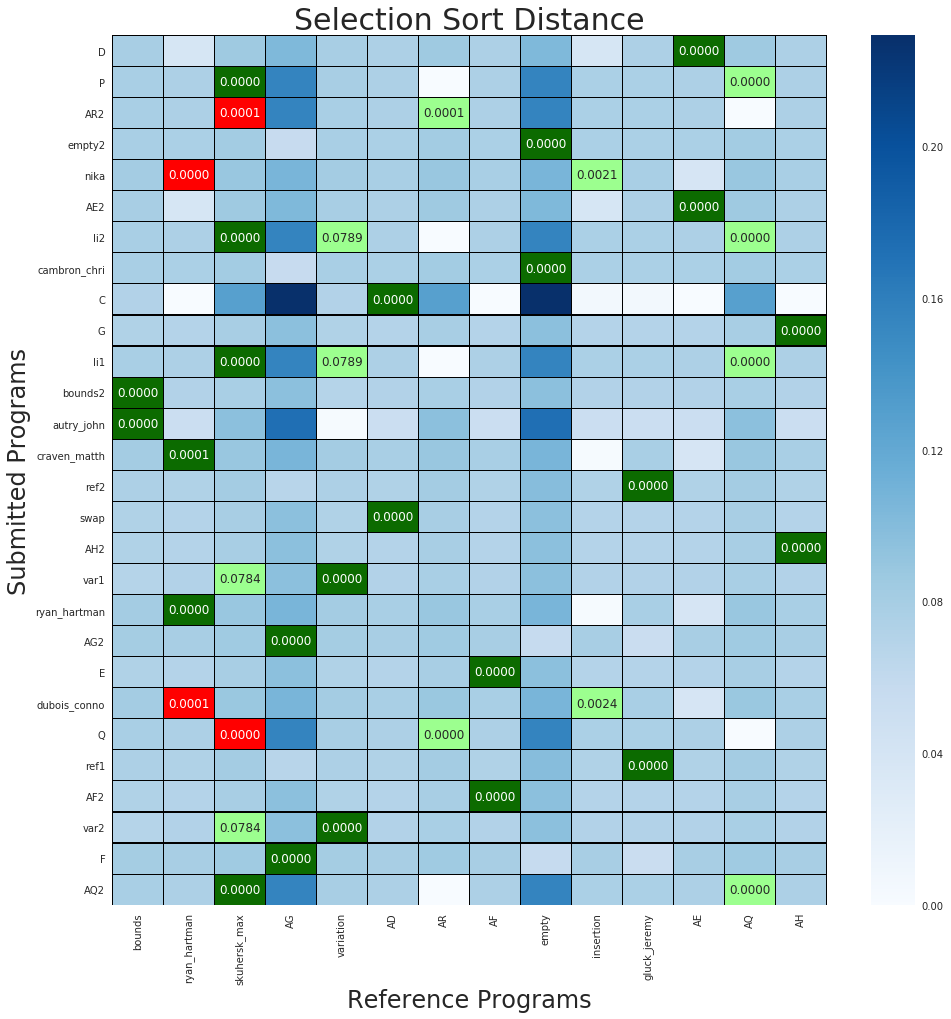

In [193]:
csvFile = "AutomatedProgramFeedback/editDistanceMappting-SelectionRyan.csv"
df = pd.read_csv(csvFile)
xLabels,yLabels = getAxisLabels(df)
del xLabels[0]
df = df.drop(df.columns[0], axis=1)

normed_matrix = normalize(df.as_matrix(), axis=1, norm='l1')
# normed_matrix = np.subtract(1.0, normed_matrix)
sns.set(font_scale=1)
matrix = np.zeros((28,14))
correctMapping = getSelectionMap()
matrix = addFeatureToMaskMatrix(matrix, correctMapping,yLabels,xLabels,1)
outputMapping = getOurMapping()
matrix = addFeatureToMaskMatrix(matrix, outputMapping, yLabels,xLabels,2)
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(16)
ax.set_title('Selection Sort Distance',fontsize=30)
supposedToMatch = [(0.611, 1,0.561)]
correctMatch = [(0.047,0.419,0)]
wrongMatch = ['r']
sns.set_style("darkgrid")
ax = sns.heatmap(normed_matrix,ax=ax,annot=False, cmap='Blues',fmt=".4f",linewidths=0.125,linecolor='k', mask = matrix == 1)
ax = sns.heatmap(normed_matrix,ax=ax,annot=True, cmap=supposedToMatch,fmt=".4f", mask = matrix != 1, cbar=False,linewidths=0.125,linecolor='k')
ax = sns.heatmap(normed_matrix,ax=ax,annot=True, cmap=wrongMatch,fmt=".4f", mask = matrix != 2, cbar=False,linewidths=0.125,linecolor='k')
ax = sns.heatmap(normed_matrix,ax=ax,annot=True, cmap=correctMatch,fmt=".4f", mask = matrix != 3, cbar=False,linewidths=0.125,linecolor='k',xticklabels=xLabels,yticklabels= yLabels)
ax.set_ylabel('Submitted Programs', fontsize=24)
ax.set_xlabel('Reference Programs', fontsize=24)
plt.savefig('selectionSort.pdf')

## Binary Search

In [130]:
def getBinaryMap():
    binary_map = dict()

    binary_map["Binary02"] = ["AndreCorrectSolution", "CalvinIterative", "CalvinRecursive", "JavaCorrectBSearch"]
    binary_map["Binary03"] = ["IncorrectMidpoint"]
    binary_map["Binary04"] = ["Initialization_error"]
    binary_map["Binary05"] = ["IncorrectMidpoint"]
    binary_map["Binary06"] = ["IncorrectMidpoint"]
    binary_map["Binary07"] = ["AndreCorrectSolution", "CalvinIterative", "CalvinRecursive", "JavaCorrectBSearch"]
    binary_map["Binary08"] = ["WrongComparisonTest"]
    binary_map["Binary09"] = ["AndreCorrectSolution", "CalvinIterative", "CalvinRecursive", "JavaCorrectBSearch"]
    binary_map["Binary10"] = ["AndreCorrectSolution", "CalvinIterative", "CalvinRecursive", "JavaCorrectBSearch"]
    binary_map["Binary11"] = ["Forgot"]
    binary_map["Binary12"] = ["OffByOne"]
    binary_map["Binary13"] = ["OffByOne"]
    binary_map["Binary14"] = ["updateHigh"]
    binary_map["Binary15"] = ["updateLow"]
    binary_map["Binary16"] = ["HighLowSwap"]
    binary_map["Binary17"] = ["AndreCorrectSolution", "CalvinIterative", "CalvinRecursive", "JavaCorrectBSearch"]
    binary_map["Binary18"] = ["AndreCorrectSolution", "CalvinIterative", "CalvinRecursive", "JavaCorrectBSearch"]
    return binary_map

In [131]:
def getAxisLabels(df):
    submitted = list(df[df.columns[0]])
    yLabels = list()
    for submit in submitted:
        yLabels.append(submit.replace('/udrive/student/rhartman2014/SeniorProject//programs/binary/Submissions/',''))
    
    titles = list(df.columns.values)
    xLabels = list()
    for title in titles:
        xLabels.append(title.replace('/udrive/student/rhartman2014/SeniorProject//programs/binary/References/',''))
    df.columns = xLabels
    return (xLabels,yLabels)
def getOurMapping():
    jsonFile = "EvalDiagnostics/evalData_vector_weighted.json"
    with open(jsonFile, 'r') as fp:
        readIn = json.load(fp, object_hook=json_util.object_hook)
    mapping = dict()
    for match in readIn:
        submissionName = match[0].replace('/Users/calvinwinget/SeniorProject/programs/binary/Submissions/','')
        reference = match[1].replace('/Users/calvinwinget/SeniorProject/programs/binary/References/','')
        mapping[submissionName] = reference
    return mapping

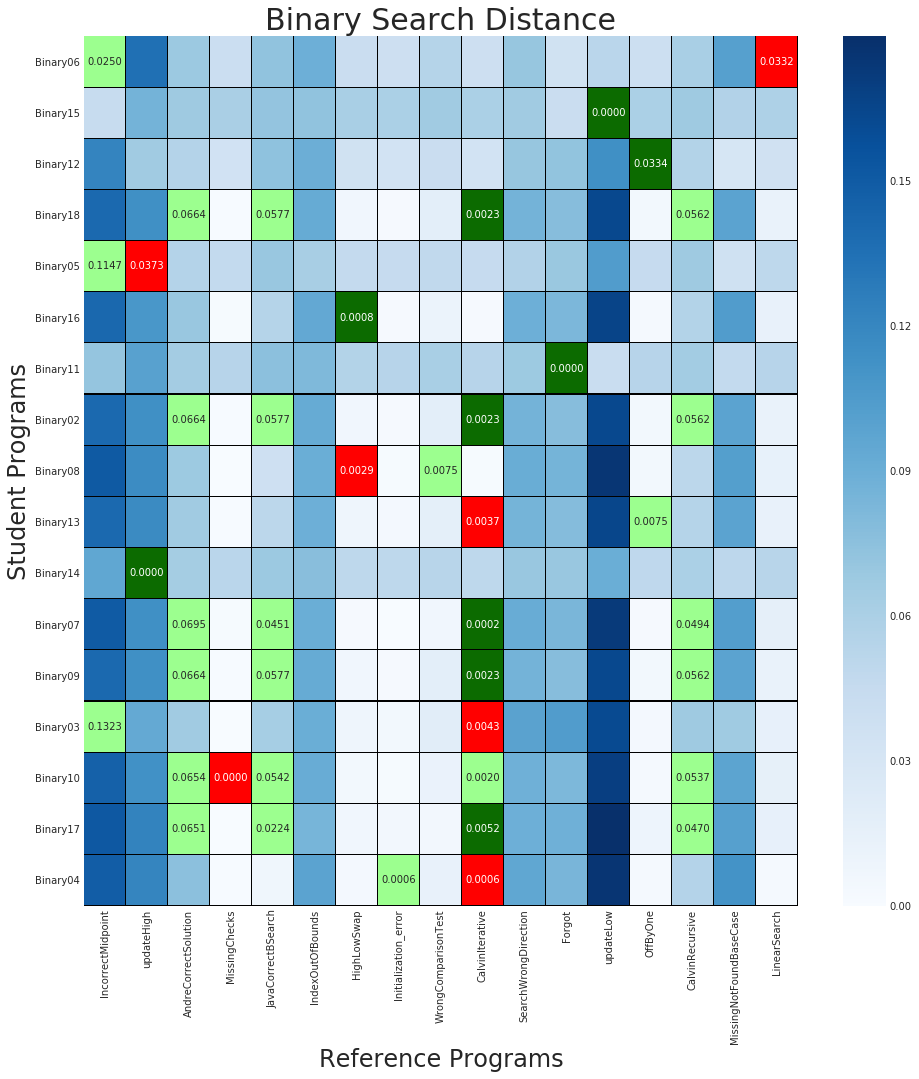

In [132]:
csvFile = "AutomatedProgramFeedback/editDistanceMappting-binaryRyan.csv"
df = pd.read_csv(csvFile)
xLabels,yLabels = getAxisLabels(df)
del xLabels[0]
df = df.drop(df.columns[0], axis=1)


normed_matrix = normalize(df.as_matrix(), axis=1, norm='l1')
#normed_matrix = np.subtract(1.0, normed_matrix)

matrix = np.zeros((17,17))
correctMapping = getBinaryMap()
matrix = addFeatureToMaskMatrix(matrix, correctMapping,yLabels,xLabels,1)
outputMapping = getOurMapping()
# print(outputMapping)
matrix = addFeatureToMaskMatrix(matrix, outputMapping, yLabels,xLabels,2)
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(16)
ax.set_title('Binary Search Distance',fontsize=30)
supposedToMatch = [(0.611, 1,0.561)]
correctMatch = [(0.047,0.419,0)]
wrongMatch = ['r']
sns.set_style("darkgrid")
ax = sns.heatmap(normed_matrix,ax=ax,annot=False, cmap='Blues',fmt=".4f",linewidths=0.125,linecolor='k', mask = matrix == 1)
ax = sns.heatmap(normed_matrix,ax=ax,annot=True, cmap=supposedToMatch,fmt=".4f", mask = matrix != 1, cbar=False,linewidths=0.125,linecolor='k',xticklabels=xLabels,yticklabels= yLabels)
ax = sns.heatmap(normed_matrix,ax=ax,annot=True, cmap=wrongMatch,fmt=".4f", mask = matrix != 2, cbar=False,linewidths=0.125,linecolor='k',xticklabels=xLabels,yticklabels= yLabels)
ax = sns.heatmap(normed_matrix,ax=ax,annot=True, cmap=correctMatch,fmt=".4f", mask = matrix != 3, cbar=False,linewidths=0.125,linecolor='k',xticklabels=xLabels,yticklabels= yLabels)
ax.set_ylabel('Student Programs', fontsize=24)
ax.set_xlabel('Reference Programs', fontsize=24)
ax.set_yticklabels(labels=yLabels, rotation='horizontal')
plt.savefig('binarySearch.pdf')

## Java List

In [150]:
def getListMap():
    list_map = dict()
    list_map["14R21A0561"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["14R21A0567"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["14R21A0580"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["ahmadbook5"] = ["aaqiqsaad", "achati"]
    list_map["aisle2678"] = ["aaqiqsaad", "achati"]
    list_map["akotkarniranjan3"] = ["aaqiqsaad", "achati"]
    list_map["anuj_phophalia"] = ["aaqiqsaad", "achati"]
    list_map["anuj_shah_94"] = ["aaqiqsaad", "achati"]
    list_map["asnehareddy29"] = ["aaqiqsaad", "achati"]
    list_map["avirohi"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["ayoma91"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["bablobko"] = ["3412georgian","andreea_b156","arushi011"]
    list_map["bhuvanakvm"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["bigjimnolan"] = ["aaqiqsaad", "achati"]
    list_map["brasbat"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["bryanfry"] = ["3412georgian","andreea_b156","arushi011"]
    list_map["btynybekovt"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["CGardner"] = ["3412georgian","andreea_b156","arushi011"]
    list_map["cricket100"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["d_srikanth1129"] = ["matsishinnicolas"]
    list_map["danielpquinn"] = ["aaqiqsaad", "achati"]
    list_map["dharmilthakkar"] = ["aaqiqsaad", "achati"]
    list_map["Fahmy_b"] = ["aaqiqsaad", "achati"]
    list_map["francesco_scigl1"] = ["matsishinnicolas"]
    list_map["glebber"] = ["aaqiqsaad", "achati"]
    list_map["gopirathnamt"] = ["aaqiqsaad", "achati"]
    list_map["gs_amrutha"] = ["3412georgian","andreea_b156","arushi011"]
    list_map["gvalenncia"] = ["aaqiqsaad", "achati"]
    list_map["hirahultilak"] = ["3412georgian","andreea_b156","arushi011"]
    list_map["hobbs6487"] = ["aaqiqsaad", "achati"]
    list_map["hrushikesh963"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["hvchhangani"] = ["3412georgian","andreea_b156","arushi011"]
    list_map["ianujkr"] = ["aaqiqsaad", "achati"]
    list_map["ishanbhale"] = ["matsishinnicolas"]
    list_map["it_jjayashree"] = ["aaqiqsaad", "achati"]
    list_map["janson_chung"] = ["3412georgian","andreea_b156","arushi011"]
    list_map["kanwalpreet_kaur"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["Karthikeyen"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["kaviya35"] = ["aaqiqsaad", "achati"]
    list_map["kishan197"] = ["matsishinnicolas"]
    list_map["konduruharish0"] = ["aaqiqsaad", "achati"]
    list_map["kpshri"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["Krash9001"] = ["aaqiqsaad", "achati"]
    list_map["krishna_kushwaha"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["leventtanin"] = ["aaqiqsaad", "achati"]
    list_map["lingesharya9"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["lsantric"] = ["aaqiqsaad", "achati"]
    list_map["magareachin"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["magicmax32"] = ["3412georgian","andreea_b156","arushi011"]
    list_map["MakGru"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["marcintupel"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["mateuszlajming"] = ["matsishinnicolas"]
    list_map["mehta007"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["mohonadhar"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    list_map["mpa225"] = ["3412georgian","andreea_b156","arushi011"]
    list_map["mr_m_hicham"] = ["3412georgian","andreea_b156","arushi011"]
    list_map["mtoman13"] = ["3412georgian","andreea_b156","arushi011"]
    list_map["munish420"] = ["14R21A0512", "14R21A0530", "azaykerimli"]
    return list_map

In [151]:
def getAxisLabels(df):
    submitted = list(df[df.columns[0]])
    yLabels = list()
    for submit in submitted:
        yLabels.append(submit.replace('/udrive/student/rhartman2014/SeniorProject//programs/javalist/Submissions/',''))
    
    titles = list(df.columns.values)
    xLabels = list()
    for title in titles:
        xLabels.append(title.replace('/udrive/student/rhartman2014/SeniorProject//programs/javalist/References/',''))
    df.columns = xLabels
    return (xLabels,yLabels)
def getOurMapping():
    jsonFile = "EvalDiagnostics/evalData_Hackerrank.json"
    with open(jsonFile, 'r') as fp:
        readIn = json.load(fp, object_hook=json_util.object_hook)
    mapping = dict()
    for match in readIn:
        submissionName = match[0].replace('/udrive/student/rhartman2014/SeniorProject//programs/javalist/Submissions/','')
        reference = match[1].replace('/udrive/student/rhartman2014/SeniorProject//programs/javalist/References/','')
        mapping[submissionName] = reference
    return mapping

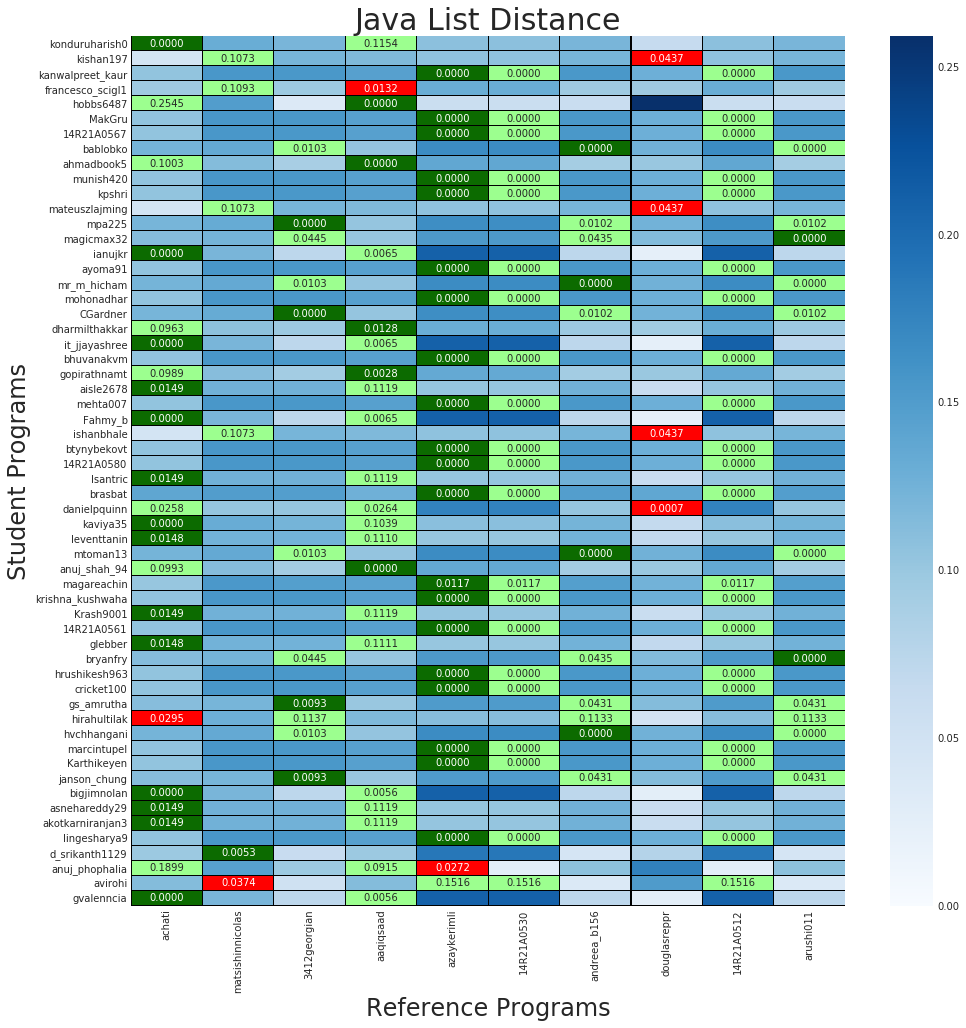

In [152]:
csvFile = "AutomatedProgramFeedback/editDistanceMappting-Javalist.csv"
df = pd.read_csv(csvFile)
xLabels,yLabels = getAxisLabels(df)
del xLabels[0]
df = df.drop(df.columns[0], axis=1)


normed_matrix = normalize(df.as_matrix(), axis=1, norm='l1')
#normed_matrix = np.subtract(1.0, normed_matrix)

matrix = np.zeros(df.shape)
correctMapping = getListMap()
matrix = addFeatureToMaskMatrix(matrix, correctMapping,yLabels,xLabels,1)
outputMapping = getOurMapping()
# print(outputMapping)
matrix = addFeatureToMaskMatrix(matrix, outputMapping, yLabels,xLabels,2)
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(16)
ax.set_title('Java List Distance',fontsize=30)
supposedToMatch = [(0.611, 1,0.561)]
correctMatch = [(0.047,0.419,0)]
wrongMatch = ['r']
sns.set_style("darkgrid")
ax = sns.heatmap(normed_matrix,ax=ax,annot=False, cmap='Blues',fmt=".4f",linewidths=0.125,linecolor='k', mask = matrix == 1)
ax = sns.heatmap(normed_matrix,ax=ax,annot=True, cmap=supposedToMatch,fmt=".4f", mask = matrix != 1, cbar=False,linewidths=0.125,linecolor='k',xticklabels=xLabels,yticklabels= yLabels)
ax = sns.heatmap(normed_matrix,ax=ax,annot=True, cmap=wrongMatch,fmt=".4f", mask = matrix != 2, cbar=False,linewidths=0.125,linecolor='k',xticklabels=xLabels,yticklabels= yLabels)
ax = sns.heatmap(normed_matrix,ax=ax,annot=True, cmap=correctMatch,fmt=".4f", mask = matrix != 3, cbar=False,linewidths=0.125,linecolor='k',xticklabels=xLabels,yticklabels= yLabels)
ax.set_ylabel('Student Programs', fontsize=24)
ax.set_xlabel('Reference Programs', fontsize=24)
ax.set_yticklabels(labels=yLabels, rotation='horizontal')
plt.savefig('javaList.pdf')

# Appendix

## Average Weights

In [96]:
xLabels = ['',
			'Line\nDistance',
			'Method\nDistance',
			'Timeout\nDistance',
			'Exit\nStatus\nDistance',
			'Exception\nType\nDistance',
			'Program\nOutput\nDistance',
			'Edit\nDistance']

selectionY = np.array([2.0, 19.0, 6.0, 8.0, 4.0, 18.0, 20.0])
selectionY /= 28

binaryY = np.array([2.0, 6.0, 5.0, 5.0, 0.0, 8.0, 9.0])
binaryY /= 17
averageWeights = selectionY
averageWeights += binaryY
averageWeights /=2.0
print(xLabels)
print(averageWeights)

['', 'Line\nDistance', 'Method\nDistance', 'Timeout\nDistance', 'Exit\nStatus\nDistance', 'Exception\nType\nDistance', 'Program\nOutput\nDistance', 'Edit\nDistance']
[ 0.09453782  0.5157563   0.25420168  0.28991597  0.07142857  0.55672269
  0.62184874]


In [198]:
selectionY = np.array([2.0, 19.0, 6.0, 8.0, 4.0, 18.0, 20.0])
selectionY *= 100/28

binaryY = np.array([2.0, 6.0, 5.0, 5.0, 0.0, 8.0, 9.0])
binaryY *= 100/17

listY = np.array([20,49,20,46,46,50,50])
listY *= 100/58
averageWeights = selectionY
averageWeights += binaryY
averageWeights += listY
averageWeights /=3.0
averageWeights


array([ 12.        ,  45.33333333,  21.        ,  31.66666667,
        19.33333333,  48.        ,  51.66666667])